# PCB 瑕疵檢測
- 資料集: [PCB Defect dataset](https://www.kaggle.com/datasets/norbertelter/pcb-defect-dataset)
- 模型　: [Yolo V11 s](https://docs.ultralytics.com/models/yolo11/)

## 匯入套件

In [14]:
from pathlib import Path

from IPython.display import Image, display
from ultralytics import YOLO

import wandb

## 設定 Project 及 Logger

In [17]:
PROJECT = "pcb_defect"
NAME = "v3"
experiment_path = Path(f"{PROJECT}/{NAME}")
experiment_test_path = Path(f"{PROJECT}/{NAME}_test")

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: devilhyt. Use `wandb login --relogin` to force relogin


True

## 設定訓練參數

In [4]:
training_setting = {
    "data": Path("dataset/pcb-defect-dataset/data.yaml").resolve(),
    "epochs": 300,
    "patience": 10,
    "batch": 64,
    "imgsz": 600,
    "project": PROJECT,
    "name": NAME,
    "plots": True,
    "optimizer": "AdamW",
    "lr0": 0.0001,
    "lrf": 0.1,
    "momentum": 0.9,
}

## 設定資料增強

In [5]:
augmentation = {
    "hsv_h": 0.015,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "degrees": 45.0,
    "translate": 0.1,
    "scale": 0.5,
    "shear": 5.0,
    "perspective": 0.0,
    "flipud": 0.5,
    "fliplr": 0.5,
    "mosaic": 1.0,
    "erasing": 0.2,
    "crop_fraction": 1.0,
}

## 訓練模型，並評估驗證集

In [6]:
model = YOLO("yolo11s.pt")
results = model.train(**training_setting, **augmentation)

New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA TITAN RTX, 24205MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/g113056077/Projects/nchu-stuff/2024-fall/cv/pcb_defect_detection/dataset/pcb-defect-dataset/data.yaml, epochs=300, time=None, patience=10, batch=64, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=pcb_defect, name=v3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]


train: Scanning /home/g113056077/Projects/nchu-stuff/2024-fall/cv/pcb_defect_detection/dataset/pcb-defect-dataset/train/labels.cache... 6370 images, 2164 backgrounds, 0 corrupt: 100%|██████████| 8534/8534 [00:00<?, ?it/s]
val: Scanning /home/g113056077/Projects/nchu-stuff/2024-fall/cv/pcb_defect_detection/dataset/pcb-defect-dataset/val/labels.cache... 802 images, 264 backgrounds, 0 corrupt: 100%|██████████| 1066/1066 [00:00<?, ?it/s]


Plotting labels to pcb_defect/v3/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 608 train, 608 val
Using 8 dataloader workers
Logging results to pcb_defect/v3
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300        15G      2.281       4.18      1.558         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all       1066       1595      0.126      0.323      0.194     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      15.1G      1.778      1.769      1.252         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all       1066       1595       0.62      0.682      0.619      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      15.1G      1.653       1.42       1.19         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595      0.819      0.812      0.855      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      15.1G      1.577       1.21      1.151         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595      0.894      0.874      0.928      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      15.1G      1.539      1.082       1.14         35        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.892      0.869      0.915      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      15.1G      1.513      1.015      1.123         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.892      0.851      0.913      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      15.1G      1.499     0.9631      1.118         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.924      0.887      0.948      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      15.1G      1.493     0.9278      1.119         52        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595      0.922      0.903      0.942       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      15.1G      1.475     0.8946      1.103         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.947      0.916      0.951      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      15.1G      1.464     0.8624      1.104         48        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.905      0.898      0.942      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      15.1G      1.447     0.8344      1.099         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.955      0.939      0.964      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      15.1G      1.429     0.8043      1.088         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595       0.95      0.906      0.959      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      15.1G      1.421     0.7866       1.09         26        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all       1066       1595      0.955      0.933      0.961      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      15.1G      1.418     0.7742      1.086         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.959      0.941       0.96      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      15.1G      1.409     0.7554      1.084         57        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.946      0.962      0.972      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      15.1G      1.404     0.7486      1.077         42        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.964      0.941      0.969      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      15.1G       1.39     0.7287      1.078         28        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.964      0.942      0.973      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      15.1G      1.402     0.7244      1.078         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.922      0.936      0.957      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      15.1G      1.388     0.7083      1.078         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.971      0.952      0.976      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      15.1G       1.38     0.6964      1.071         60        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all       1066       1595      0.967      0.949      0.976      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      15.1G      1.371     0.6972      1.069         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.962      0.963      0.976      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      15.1G      1.368     0.6964      1.068         48        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all       1066       1595      0.964      0.964      0.976      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      15.1G      1.356     0.6749      1.064         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all       1066       1595      0.962      0.955      0.977      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      15.1G      1.352     0.6756      1.066         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all       1066       1595      0.974      0.958      0.976      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      15.1G      1.357     0.6712      1.064         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595      0.968      0.954      0.975      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      15.1G      1.344     0.6616      1.059         44        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.976      0.964      0.979      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      15.1G      1.339     0.6628      1.051         47        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.977      0.965      0.984      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      15.1G      1.347     0.6591      1.064         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.966       0.96      0.979       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      15.1G      1.333     0.6407      1.056         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all       1066       1595      0.963      0.956      0.979      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      15.1G      1.321     0.6357      1.053         50        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all       1066       1595      0.972      0.962       0.98      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      15.1G      1.327     0.6364       1.05         52        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.977      0.971      0.983      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      15.1G       1.32     0.6346      1.046         30        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.974      0.969      0.983      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      15.1G      1.318     0.6318       1.05         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.98      0.963      0.983       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      15.1G      1.309     0.6319      1.044         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all       1066       1595      0.979      0.975      0.986      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      15.1G      1.303     0.6249       1.04         50        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.974      0.969      0.986       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      15.1G      1.311     0.6194      1.044         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.974      0.961      0.977      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      15.1G      1.297     0.6139       1.04         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.975      0.963      0.982      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      15.1G      1.282     0.6042      1.033         49        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.974       0.97      0.986      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      15.1G      1.281     0.6034      1.032         52        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.975      0.982      0.989      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      15.1G      1.278     0.6018      1.033         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.973      0.968      0.984      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      15.1G      1.271     0.5978       1.03         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.963      0.974      0.986      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      15.1G      1.266     0.5951      1.028         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.977      0.965      0.986      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      15.1G      1.253      0.588      1.026         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.977      0.974      0.988      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      15.1G      1.263     0.5956      1.029         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.981      0.977       0.99      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      15.1G      1.254     0.5866       1.02         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.978      0.968      0.987      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      15.1G      1.271     0.5949      1.032         49        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.977      0.981      0.988      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      15.1G      1.249     0.5776       1.02         36        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.972      0.983      0.987      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      15.1G      1.242     0.5791      1.018         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.979      0.969      0.987      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      15.1G      1.248     0.5807      1.017         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.974      0.979      0.987      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      15.1G      1.237     0.5729      1.014         37        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.974      0.981      0.989      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      15.1G      1.234     0.5657      1.014         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all       1066       1595      0.981      0.975      0.989      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      15.1G      1.223     0.5616      1.012         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.978       0.98      0.989      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      15.1G      1.229     0.5701      1.011         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.982      0.977      0.989      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      15.1G       1.22     0.5634      1.008         42        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.982      0.978      0.991       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      15.1G      1.209     0.5598      1.006         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.976      0.983      0.991      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      15.1G      1.208     0.5568      1.006         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.978      0.981       0.99       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      15.1G      1.207      0.556      1.001         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.979      0.982       0.99      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      15.1G      1.201     0.5538     0.9958         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.975      0.986      0.991      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      15.1G      1.188     0.5398     0.9945         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.973      0.982      0.991      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      15.1G      1.192      0.549     0.9968         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.982      0.984      0.992      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      15.1G       1.19      0.552     0.9961         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.985      0.981       0.99      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      15.1G       1.18     0.5407     0.9912         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.982      0.985      0.992        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      15.1G       1.18     0.5511     0.9873         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.981      0.978      0.992      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      15.1G      1.179     0.5462     0.9882         69        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.974      0.991      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      15.1G      1.164     0.5383     0.9855         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.981      0.985      0.991      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      15.1G      1.176     0.5348     0.9891         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.982      0.984      0.991      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      15.1G      1.165     0.5353     0.9883         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.982      0.986      0.991      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      15.1G      1.156     0.5293     0.9851         32        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.984      0.978      0.992      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      15.1G      1.158     0.5291      0.988         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.983      0.984      0.992      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      15.1G      1.147     0.5236     0.9803         36        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.985      0.986      0.992      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      15.1G      1.151     0.5233     0.9789         59        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.986      0.985      0.992      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      15.1G      1.136     0.5172      0.977         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.981       0.99      0.993      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      15.1G       1.14     0.5208     0.9797         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.983      0.993      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      15.1G      1.132     0.5229      0.974         54        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.979       0.99      0.992      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      15.1G      1.126     0.5189     0.9752         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.986      0.984      0.993      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      15.1G      1.123     0.5198     0.9747         39        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.984      0.986      0.992      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      15.1G      1.117     0.5113     0.9695         36        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.982      0.987      0.992      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      15.1G       1.12     0.5167     0.9682         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.982      0.987      0.992      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      15.1G      1.118     0.5101     0.9734         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all       1066       1595      0.988       0.98      0.993      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      15.1G      1.116     0.5064     0.9694         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.982      0.986      0.993      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      15.1G      1.106     0.5106     0.9683         52        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.982      0.988      0.993      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      15.1G      1.102     0.5023     0.9633         37        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.987       0.98      0.992      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      15.1G      1.089     0.4997     0.9638         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595       0.98      0.987      0.992      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      15.1G      1.093     0.5022     0.9611         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.985      0.984      0.993      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      15.1G      1.087     0.5018     0.9625         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.987       0.98      0.993      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      15.1G      1.084        0.5     0.9621         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.986      0.978      0.992      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      15.1G      1.075     0.4938     0.9551         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.989      0.977      0.993      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      15.1G      1.082     0.4962     0.9599         44        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.986      0.977      0.993      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      15.1G      1.072     0.4862     0.9589         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.981      0.988      0.993      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      15.1G       1.07     0.4929     0.9582         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.979      0.991      0.993      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      15.1G      1.064     0.4929      0.958         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.978      0.991      0.993      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      15.1G      1.065     0.4913     0.9511         52        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595       0.98       0.99      0.993      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      15.1G      1.064     0.4905     0.9522         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.979      0.991      0.993      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      15.1G       1.05     0.4871     0.9477         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595       0.98      0.991      0.994      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      15.1G      1.041       0.48     0.9461         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.979       0.99      0.994      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      15.1G      1.043     0.4851     0.9473         27        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.98       0.99      0.994      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      15.1G      1.034     0.4796     0.9456         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.983      0.989      0.994      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      15.1G       1.03     0.4763     0.9428         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.984      0.989      0.994      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      15.1G      1.038     0.4821     0.9468         52        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.986      0.988      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      15.1G      1.033     0.4801     0.9439         34        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.987      0.988      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      15.1G      1.025     0.4736     0.9423         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.988      0.988      0.993      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      15.1G      1.017     0.4702     0.9402         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.988      0.988      0.993      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      15.1G      1.024     0.4721     0.9381         37        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.989      0.989      0.993      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      15.1G      1.011     0.4729     0.9381         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.989      0.988      0.994      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      15.1G      1.011     0.4697     0.9385         54        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.987      0.994      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      15.1G      1.013     0.4712     0.9371         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.989      0.987      0.994      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      15.1G      1.008     0.4663     0.9352         69        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.988      0.994      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      15.1G      1.001     0.4672     0.9328         58        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595       0.99      0.989      0.994      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      15.1G      1.006     0.4664     0.9379         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.989      0.994      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      15.1G     0.9969     0.4639     0.9332         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.989      0.989      0.994      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      15.1G     0.9931     0.4655     0.9307         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.988      0.988      0.993      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      15.1G     0.9843     0.4602     0.9294         44        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.988      0.994      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      15.1G     0.9844     0.4573     0.9299         44        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.988      0.994      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      15.1G     0.9823       0.46     0.9289         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595       0.99      0.988      0.994       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      15.1G     0.9807     0.4574     0.9267         34        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595       0.99      0.988      0.994       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      15.1G     0.9757     0.4579     0.9268         52        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595       0.99      0.988      0.994      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      15.1G      0.963     0.4509     0.9254         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595       0.99      0.988      0.994      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      15.1G     0.9723     0.4514     0.9287         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.989      0.989      0.993      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      15.1G     0.9648     0.4532     0.9268         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.989      0.989      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      15.1G       0.96     0.4518     0.9228         39        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595       0.99      0.988      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      15.1G     0.9634     0.4518     0.9247         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595       0.99      0.988      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      15.1G      0.959     0.4509     0.9219         33        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595       0.99      0.988      0.993      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      15.1G     0.9591     0.4472     0.9185         26        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.989      0.989      0.993      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      15.1G     0.9568     0.4466     0.9239         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.989      0.989      0.994      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      15.1G     0.9452     0.4441     0.9184         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595       0.99      0.989      0.994      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      15.1G     0.9401     0.4419     0.9194         33        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595       0.99      0.989      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      15.1G     0.9375     0.4409     0.9164         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595       0.99       0.99      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      15.1G     0.9401     0.4401     0.9157         42        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.989       0.99      0.994      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      15.1G     0.9336     0.4378     0.9114         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.989       0.99      0.994      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      15.1G      0.929     0.4331     0.9125         35        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.989       0.99      0.994      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      15.1G     0.9317     0.4422     0.9158         39        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595       0.99       0.99      0.994      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      15.1G     0.9271     0.4398      0.914         51        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.989       0.99      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      15.1G     0.9241     0.4352     0.9108         51        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.987      0.991      0.994      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      15.1G     0.9229     0.4369     0.9119         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.992      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      15.1G     0.9187     0.4354     0.9077         35        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.988      0.992      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      15.1G     0.9125      0.429     0.9083         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.987      0.992      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      15.1G     0.9149     0.4305     0.9081         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.991      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      15.1G     0.9123     0.4292     0.9091         32        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.988      0.991      0.994      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      15.1G     0.9061     0.4283      0.908         54        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595       0.99      0.988      0.994      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      15.1G     0.9018     0.4255      0.905         52        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.988      0.992      0.994      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      15.1G     0.9057     0.4313     0.9044         60        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.988      0.992      0.994      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      15.1G     0.8962     0.4259      0.903         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.992      0.994      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      15.1G     0.8958     0.4264     0.9066         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.992      0.994      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      15.1G        0.9      0.426     0.9044         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.992      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      15.1G     0.8937     0.4278     0.9026         48        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.992      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      15.1G     0.8858     0.4175     0.9032         41        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.992      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      15.1G     0.8941     0.4297     0.9043         31        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.988      0.993      0.994       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      15.1G     0.8839     0.4144      0.902         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.988      0.993      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      15.1G     0.8818     0.4191     0.9012         42        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.993      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      15.1G     0.8855     0.4195     0.8996         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.993      0.994       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      15.1G     0.8853     0.4209     0.9046         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.988      0.993      0.994       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      15.1G      0.871     0.4133     0.8985         50        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.988      0.993      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      15.1G     0.8684     0.4131     0.8992         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.988      0.993      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      15.1G     0.8744     0.4132     0.8987         50        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.988      0.993      0.994      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      15.1G     0.8743     0.4152     0.8979         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.988      0.993      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      15.1G      0.871     0.4151     0.8971         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.988      0.993      0.994      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      15.1G     0.8632     0.4088     0.8966         24        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.993      0.994      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      15.1G     0.8704     0.4182     0.8976         49        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.993      0.994      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      15.1G     0.8603     0.4091     0.8928         23        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.988      0.993      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      15.1G     0.8633     0.4136     0.8949         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.993      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      15.1G     0.8577     0.4067     0.8947         54        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.988      0.993      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      15.1G     0.8571     0.4092     0.8938         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.988      0.993      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      15.1G     0.8507     0.4077     0.8916         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.988      0.993      0.994      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      15.1G     0.8514     0.4055       0.89         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.988      0.993      0.994      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      15.1G     0.8501     0.4071     0.8865         48        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.988      0.993      0.994      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      15.1G      0.844     0.4081     0.8932         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.989      0.993      0.994      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      15.1G     0.8377     0.4021     0.8893         55        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.989      0.993      0.994        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      15.1G      0.839     0.4017     0.8871         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.989      0.993      0.994        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      15.1G     0.8427     0.4028     0.8897         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.989      0.993      0.994      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      15.1G     0.8374     0.4019     0.8868         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.989      0.993      0.994        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      15.1G     0.8431     0.4058     0.8883         48        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.989      0.993      0.994      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      15.1G       0.84     0.4006     0.8916         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595       0.99      0.993      0.994      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      15.1G     0.8296     0.3973     0.8845         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595       0.99      0.993      0.994      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      15.1G     0.8268     0.3967     0.8849         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.989      0.993      0.994      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      15.1G     0.8342     0.4022     0.8851         59        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.989      0.993      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      15.1G     0.8255     0.3945      0.886         30        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.989      0.993      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      15.1G     0.8249     0.3972     0.8855         37        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.989      0.993      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      15.1G     0.8232     0.3952      0.885         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.989      0.993      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      15.1G     0.8199      0.397     0.8847         56        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all       1066       1595      0.989      0.993      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      15.1G     0.8138     0.3937     0.8809         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.989      0.993      0.994      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      15.1G     0.8145     0.3904      0.882         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.989      0.994      0.994      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      15.1G     0.8168     0.3991     0.8842         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.989      0.994      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      15.1G     0.8121     0.3918     0.8853         26        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.993      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      15.1G     0.8165     0.3929     0.8833         47        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595       0.99      0.993      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      15.1G     0.8109     0.3961     0.8802         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595       0.99      0.993      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      15.1G     0.8024     0.3899     0.8783         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595       0.99      0.993      0.994      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      15.1G     0.8032     0.3897     0.8775         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.991      0.993      0.994      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      15.1G     0.8075     0.3879     0.8794         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.991      0.993      0.994      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      15.1G     0.8008     0.3883       0.88         59        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.991      0.993      0.994      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      15.1G     0.8011     0.3873     0.8786         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.991      0.993      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      15.1G     0.8011     0.3893     0.8813         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.991      0.993      0.994      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      15.1G     0.7959     0.3842     0.8775         54        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.991      0.993      0.994       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      15.1G     0.7959     0.3834     0.8771         37        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.993      0.994       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      15.1G      0.799     0.3864     0.8798         53        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.992      0.993      0.994      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      15.1G      0.794     0.3824     0.8786         58        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.992      0.993      0.994      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      15.1G     0.7889     0.3807     0.8761         51        608: 100%|██████████| 134/134 [00:55<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.992      0.993      0.994      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      15.1G     0.7809     0.3821     0.8743         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.992      0.993      0.994      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      15.1G     0.7885     0.3824     0.8773         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.992      0.993      0.994      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      15.1G      0.788     0.3834     0.8769         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.991      0.993      0.994      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      15.1G     0.7834     0.3791     0.8746         52        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.991      0.994      0.994      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      15.1G     0.7763     0.3815     0.8744         29        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.991      0.993      0.994      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      15.1G     0.7804     0.3809      0.875         50        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.991      0.994      0.994      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      15.1G     0.7827     0.3789     0.8739         57        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.991      0.993      0.994      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      15.1G     0.7768     0.3793     0.8735         35        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.991      0.993      0.994      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      15.1G     0.7813     0.3816     0.8749         44        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.992      0.994      0.994      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      15.1G     0.7811     0.3796     0.8735         30        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.991      0.994      0.994      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      15.1G     0.7773     0.3783     0.8752         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.992      0.994      0.994      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      15.1G     0.7705     0.3781     0.8742         40        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.994      0.994      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      15.1G     0.7724     0.3795     0.8736         37        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.994      0.994      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      15.1G     0.7658     0.3774     0.8713         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.994      0.994      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      15.1G      0.766     0.3704      0.874         29        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.993      0.994      0.994      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      15.1G     0.7639     0.3688     0.8707         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.994      0.994      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      15.1G     0.7654     0.3724     0.8713         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.994      0.994      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      15.1G     0.7567     0.3691     0.8694         32        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.994      0.994      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      15.1G     0.7603     0.3687     0.8697         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.994      0.994      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      15.1G     0.7638     0.3688     0.8683         33        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.994      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      15.1G     0.7632     0.3724     0.8688         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.993      0.994      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      15.1G     0.7521     0.3698     0.8676         35        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.994      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      15.1G     0.7578     0.3715     0.8699         56        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.994      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      15.1G     0.7443     0.3662     0.8651         42        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.992      0.994      0.994      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      15.1G     0.7458     0.3632     0.8677         45        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.994      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      15.1G     0.7503     0.3666     0.8653         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.992      0.994      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      15.1G     0.7431     0.3647     0.8639         51        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.994      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      15.1G      0.749     0.3629     0.8672         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.994      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      15.1G     0.7531     0.3701     0.8659         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.992      0.994      0.995      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      15.1G     0.7512     0.3645     0.8643         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.992      0.994      0.995      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      15.1G     0.7483     0.3677     0.8668         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.992      0.993      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      15.1G     0.7444      0.364     0.8647         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.994      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      15.1G     0.7376     0.3573     0.8616         39        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.994      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      15.1G     0.7403     0.3617     0.8634         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.994      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      15.1G     0.7401     0.3625     0.8662         49        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.994      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      15.1G     0.7371      0.361     0.8642         52        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all       1066       1595      0.993      0.994      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      15.1G     0.7315     0.3606     0.8639         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.993      0.994      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      15.1G     0.7369     0.3638     0.8625         50        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.994      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      15.1G     0.7357     0.3589     0.8628         49        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.993      0.994      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      15.1G     0.7315     0.3596     0.8615         49        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.994      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      15.1G     0.7323     0.3559      0.861         43        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.994      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      15.1G     0.7335     0.3599     0.8625         50        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.994      0.995      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      15.1G     0.7202     0.3541     0.8592         58        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.992      0.995      0.995      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      15.1G     0.7255     0.3611     0.8616         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all       1066       1595      0.992      0.995      0.995      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      15.1G     0.7248     0.3565     0.8604         30        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.992      0.995      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      15.1G     0.7314     0.3579     0.8615         62        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.992      0.995      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      15.1G     0.7253     0.3584       0.86         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.992      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      15.1G     0.7208     0.3534       0.86         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.992      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      15.1G     0.7216     0.3561     0.8617         37        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      15.1G       0.72     0.3544     0.8586         37        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.993      0.995      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      15.1G     0.7169     0.3491     0.8576         53        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.995      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      15.1G     0.7173     0.3559     0.8601         58        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.993      0.995      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      15.1G     0.7173     0.3512     0.8561         56        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.995      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      15.1G     0.7132     0.3505     0.8585         47        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.995      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      15.1G     0.7108     0.3509     0.8569         56        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      15.1G     0.7168     0.3547     0.8566         49        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.995      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      15.1G     0.7154     0.3542     0.8595         59        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.995      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      15.1G     0.7093     0.3522     0.8557         32        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      15.1G     0.7067     0.3499     0.8553         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      15.1G     0.7094     0.3494     0.8558         54        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      15.1G     0.7119      0.352     0.8548         47        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.996      0.995      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      15.1G     0.7088     0.3472     0.8563         31        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      15.1G      0.706     0.3474     0.8549         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.996      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      15.1G     0.6956     0.3481     0.8539         35        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.996      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      15.1G     0.6961     0.3427     0.8552         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.996      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      15.1G     0.6992     0.3479     0.8549         43        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      15.1G     0.7061     0.3482     0.8536         59        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      15.1G     0.6952     0.3469     0.8517         49        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.996      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      15.1G     0.6992     0.3461     0.8513         31        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      15.1G     0.6989     0.3443     0.8552         55        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.996      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      15.1G     0.7013     0.3444     0.8551         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all       1066       1595      0.993      0.996      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      15.1G      0.696     0.3487     0.8557         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      15.1G     0.6958     0.3424     0.8523         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all       1066       1595      0.993      0.996      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      15.1G      0.696     0.3472      0.856         46        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all       1066       1595      0.993      0.996      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      15.1G     0.6926     0.3445     0.8523         38        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      15.1G     0.6947     0.3453     0.8506         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.996      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      15.1G     0.6932     0.3462     0.8541         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      15.1G     0.6871     0.3422     0.8523         54        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.996      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      15.1G      0.684     0.3412     0.8509         42        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.996      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      15.1G      0.684     0.3415     0.8491         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all       1066       1595      0.993      0.996      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      15.1G     0.6851     0.3407     0.8516         40        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.996      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      15.1G     0.6836      0.342     0.8521         45        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.993      0.996      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      15.1G     0.6873     0.3408     0.8522         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.996      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      15.1G      0.683     0.3411     0.8511         46        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.996      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      15.1G     0.6817     0.3396     0.8509         57        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all       1066       1595      0.993      0.996      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      15.1G     0.6776     0.3369     0.8475         38        608: 100%|██████████| 134/134 [00:55<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.995      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      15.1G       0.68     0.3351     0.8489         62        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.993      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      15.1G     0.6789     0.3374     0.8483         47        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      15.1G     0.6766     0.3386      0.847         39        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      15.1G      0.676     0.3369     0.8492         41        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      15.1G     0.6728     0.3376      0.848         39        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      15.1G      0.673     0.3357     0.8469         64        608: 100%|██████████| 134/134 [00:55<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all       1066       1595      0.993      0.995      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      15.1G     0.6726     0.3355     0.8481         44        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.993      0.995      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      15.1G     0.6732     0.3374     0.8464         51        608: 100%|██████████| 134/134 [00:54<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.995      0.995      0.749


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      15.1G     0.6542      0.312     0.8563         32        608: 100%|██████████| 134/134 [00:55<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.993      0.995      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      15.1G     0.6203     0.2955     0.8468         37        608: 100%|██████████| 134/134 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all       1066       1595      0.993      0.995      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      15.1G     0.6036     0.2868     0.8438         28        608: 100%|██████████| 134/134 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all       1066       1595      0.993      0.995      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      15.1G     0.6014     0.2881     0.8422         30        608: 100%|██████████| 134/134 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all       1066       1595      0.993      0.995      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      15.1G     0.5967      0.289     0.8428         30        608: 100%|██████████| 134/134 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      15.1G     0.5891     0.2842     0.8384         23        608: 100%|██████████| 134/134 [00:54<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all       1066       1595      0.997      0.992      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      15.1G     0.5917     0.2873     0.8395         30        608: 100%|██████████| 134/134 [00:54<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.997      0.992      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      15.1G     0.5921     0.2847     0.8424         25        608: 100%|██████████| 134/134 [00:54<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.994      0.993      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      15.1G     0.5916     0.2852     0.8401         32        608: 100%|██████████| 134/134 [00:54<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all       1066       1595      0.993      0.995      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      15.1G     0.5838     0.2854     0.8391         31        608: 100%|██████████| 134/134 [00:54<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all       1066       1595      0.993      0.995      0.995      0.752



300 epochs completed in 4.930 hours.
Optimizer stripped from pcb_defect/v3/weights/last.pt, 19.2MB
Optimizer stripped from pcb_defect/v3/weights/best.pt, 19.2MB

Validating pcb_defect/v3/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA TITAN RTX, 24205MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]


                   all       1066       1595      0.993      0.995      0.995      0.751
            mouse_bite        140        280      0.996          1      0.995      0.768
                  spur        130        262      0.998          1      0.995      0.755
          missing_hole        118        229      0.995          1      0.995       0.76
                 short        158        327      0.991       0.98      0.994      0.755
          open_circuit        135        259      0.999      0.996      0.995      0.708
       spurious_copper        121        238      0.979      0.991      0.994      0.763
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to pcb_defect/v3


lr/pg0,██████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▃▃▂▂▂▂▂▂▁▁▁▁
lr/pg1,██▇▆▆▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
lr/pg2,████▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▁
metrics/mAP50(B),▁▂▄▄▆▇██████████████████████████████████
metrics/mAP50-95(B),▁▁▂▁▂▃▃▂▃▃▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇█████████
metrics/precision(B),▁▃▅▅▃▅▅▆▆▆▇▇▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇█
metrics/recall(B),▁▄▄▆▅▆▇▇▇▇▇▇████████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▇▆▆▆▆▆▆▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁


In [7]:
wandb.finish()

## 觀察訓練結果

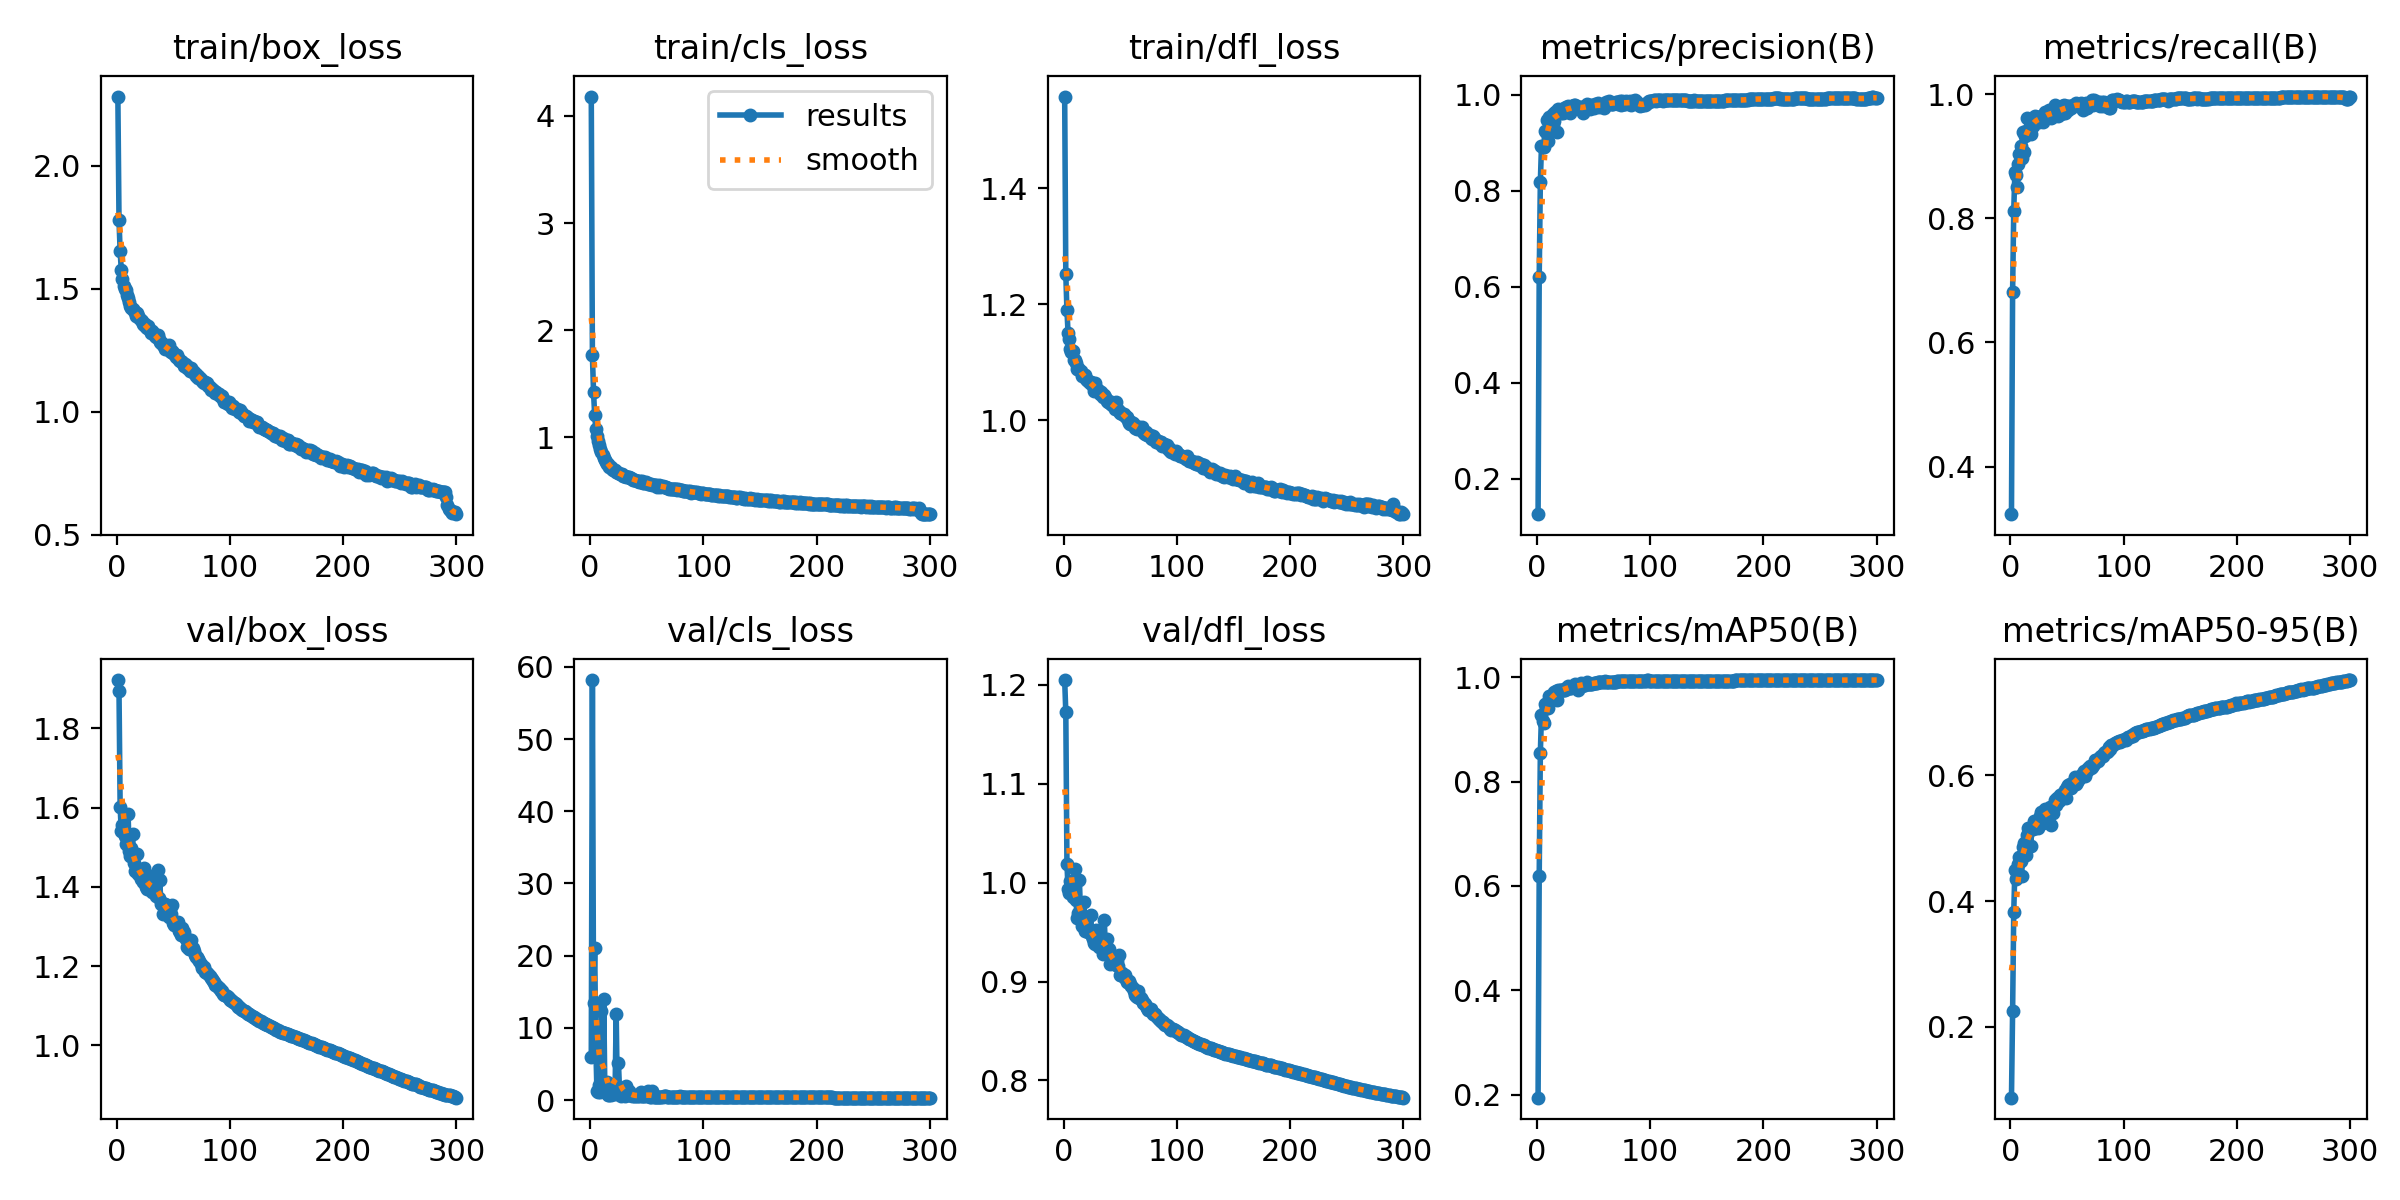

In [ ]:
display(Image(experiment_path / "results.png"))

## 觀察 Precision-Recall Curve 及 mAP@0.5

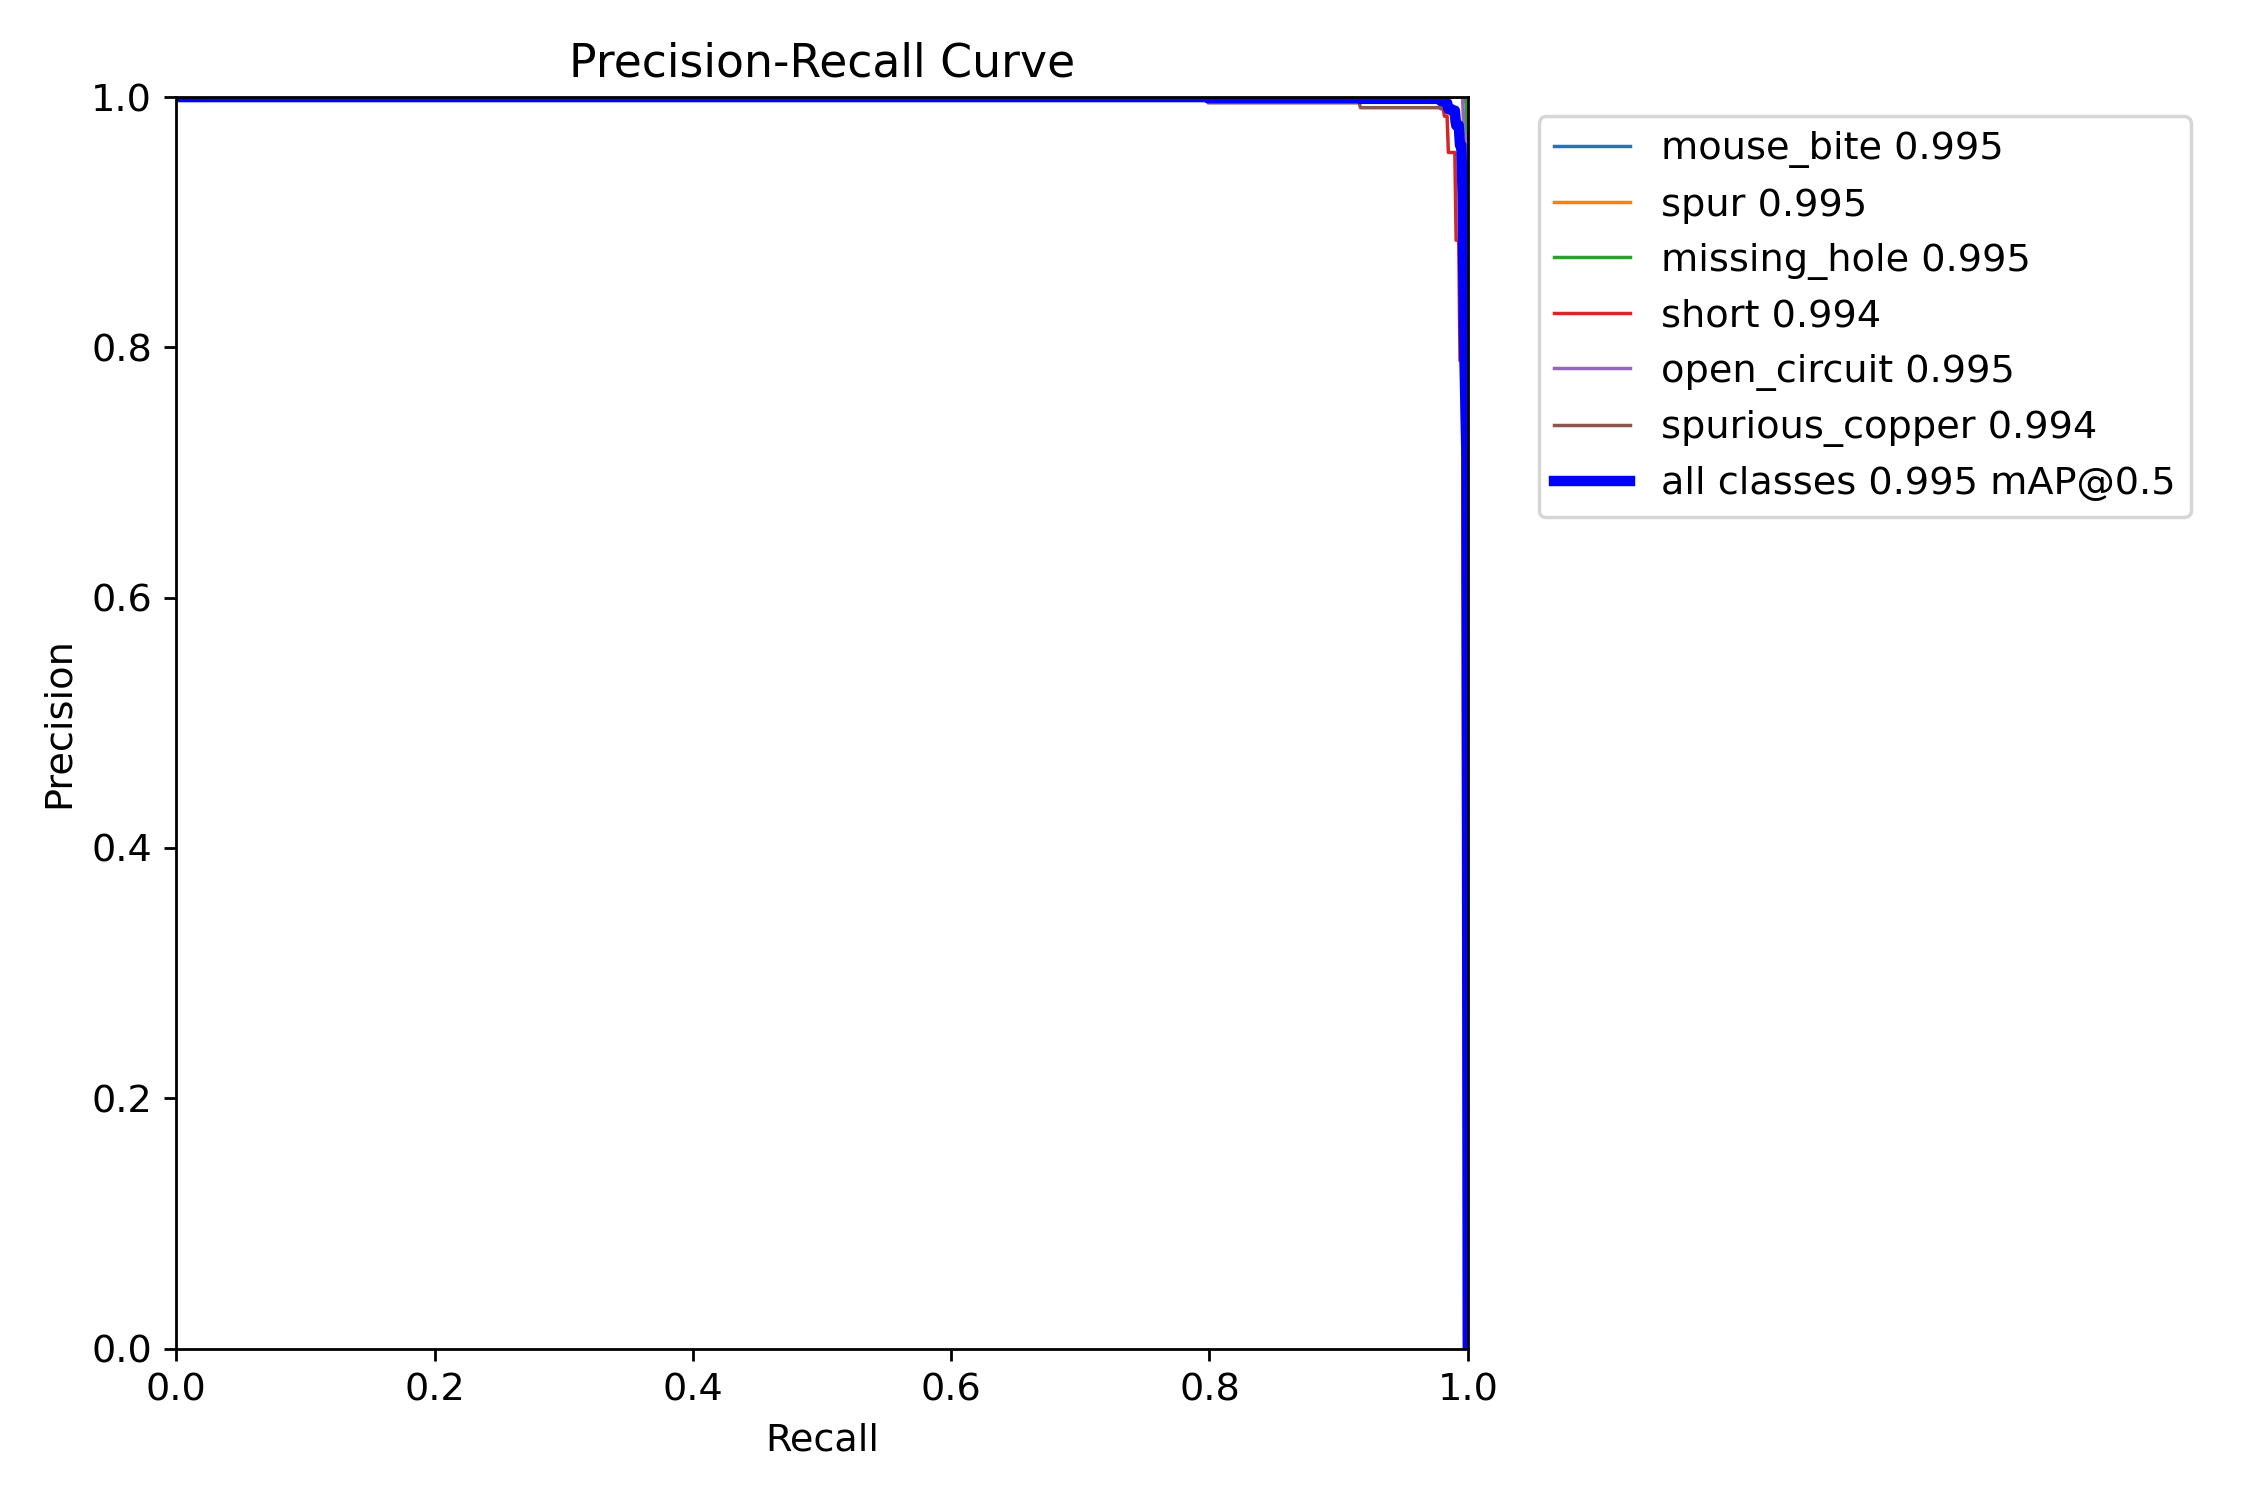

In [21]:
display(Image(experiment_path / "PR_curve.png"))

## 評估測試集

In [ ]:
test_setting = {
    "data": Path("dataset/pcb-defect-dataset/data.yaml").resolve(),
    "batch": 64,
    "imgsz": 600,
    "project": PROJECT,
    "name": NAME + "_test",
    "plots": True,
    "split": "test",
}

model = YOLO(experiment_path / "weights" / "best.pt")
results = model.val(**test_setting)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA TITAN RTX, 24205MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/g113056077/Projects/nchu-stuff/2024-fall/cv/pcb_defect_detection/dataset/pcb-defect-dataset/test/labels... 829 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1068/1068 [00:00<00:00, 3462.57it/s]

val: New cache created: /home/g113056077/Projects/nchu-stuff/2024-fall/cv/pcb_defect_detection/dataset/pcb-defect-dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]


                   all       1068       1662      0.995      0.996      0.995      0.759
            mouse_bite        131        262      0.992          1      0.995      0.767
                  spur        138        279      0.991      0.996      0.995      0.759
          missing_hole        145        283      0.996          1      0.995      0.766
                 short        142        275          1      0.989      0.995      0.759
          open_circuit        128        265          1      0.996      0.995      0.738
       spurious_copper        145        298       0.99      0.996      0.993      0.764
Speed: 0.6ms preprocess, 2.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to pcb_defect/v3_test


# Confusion Matrix

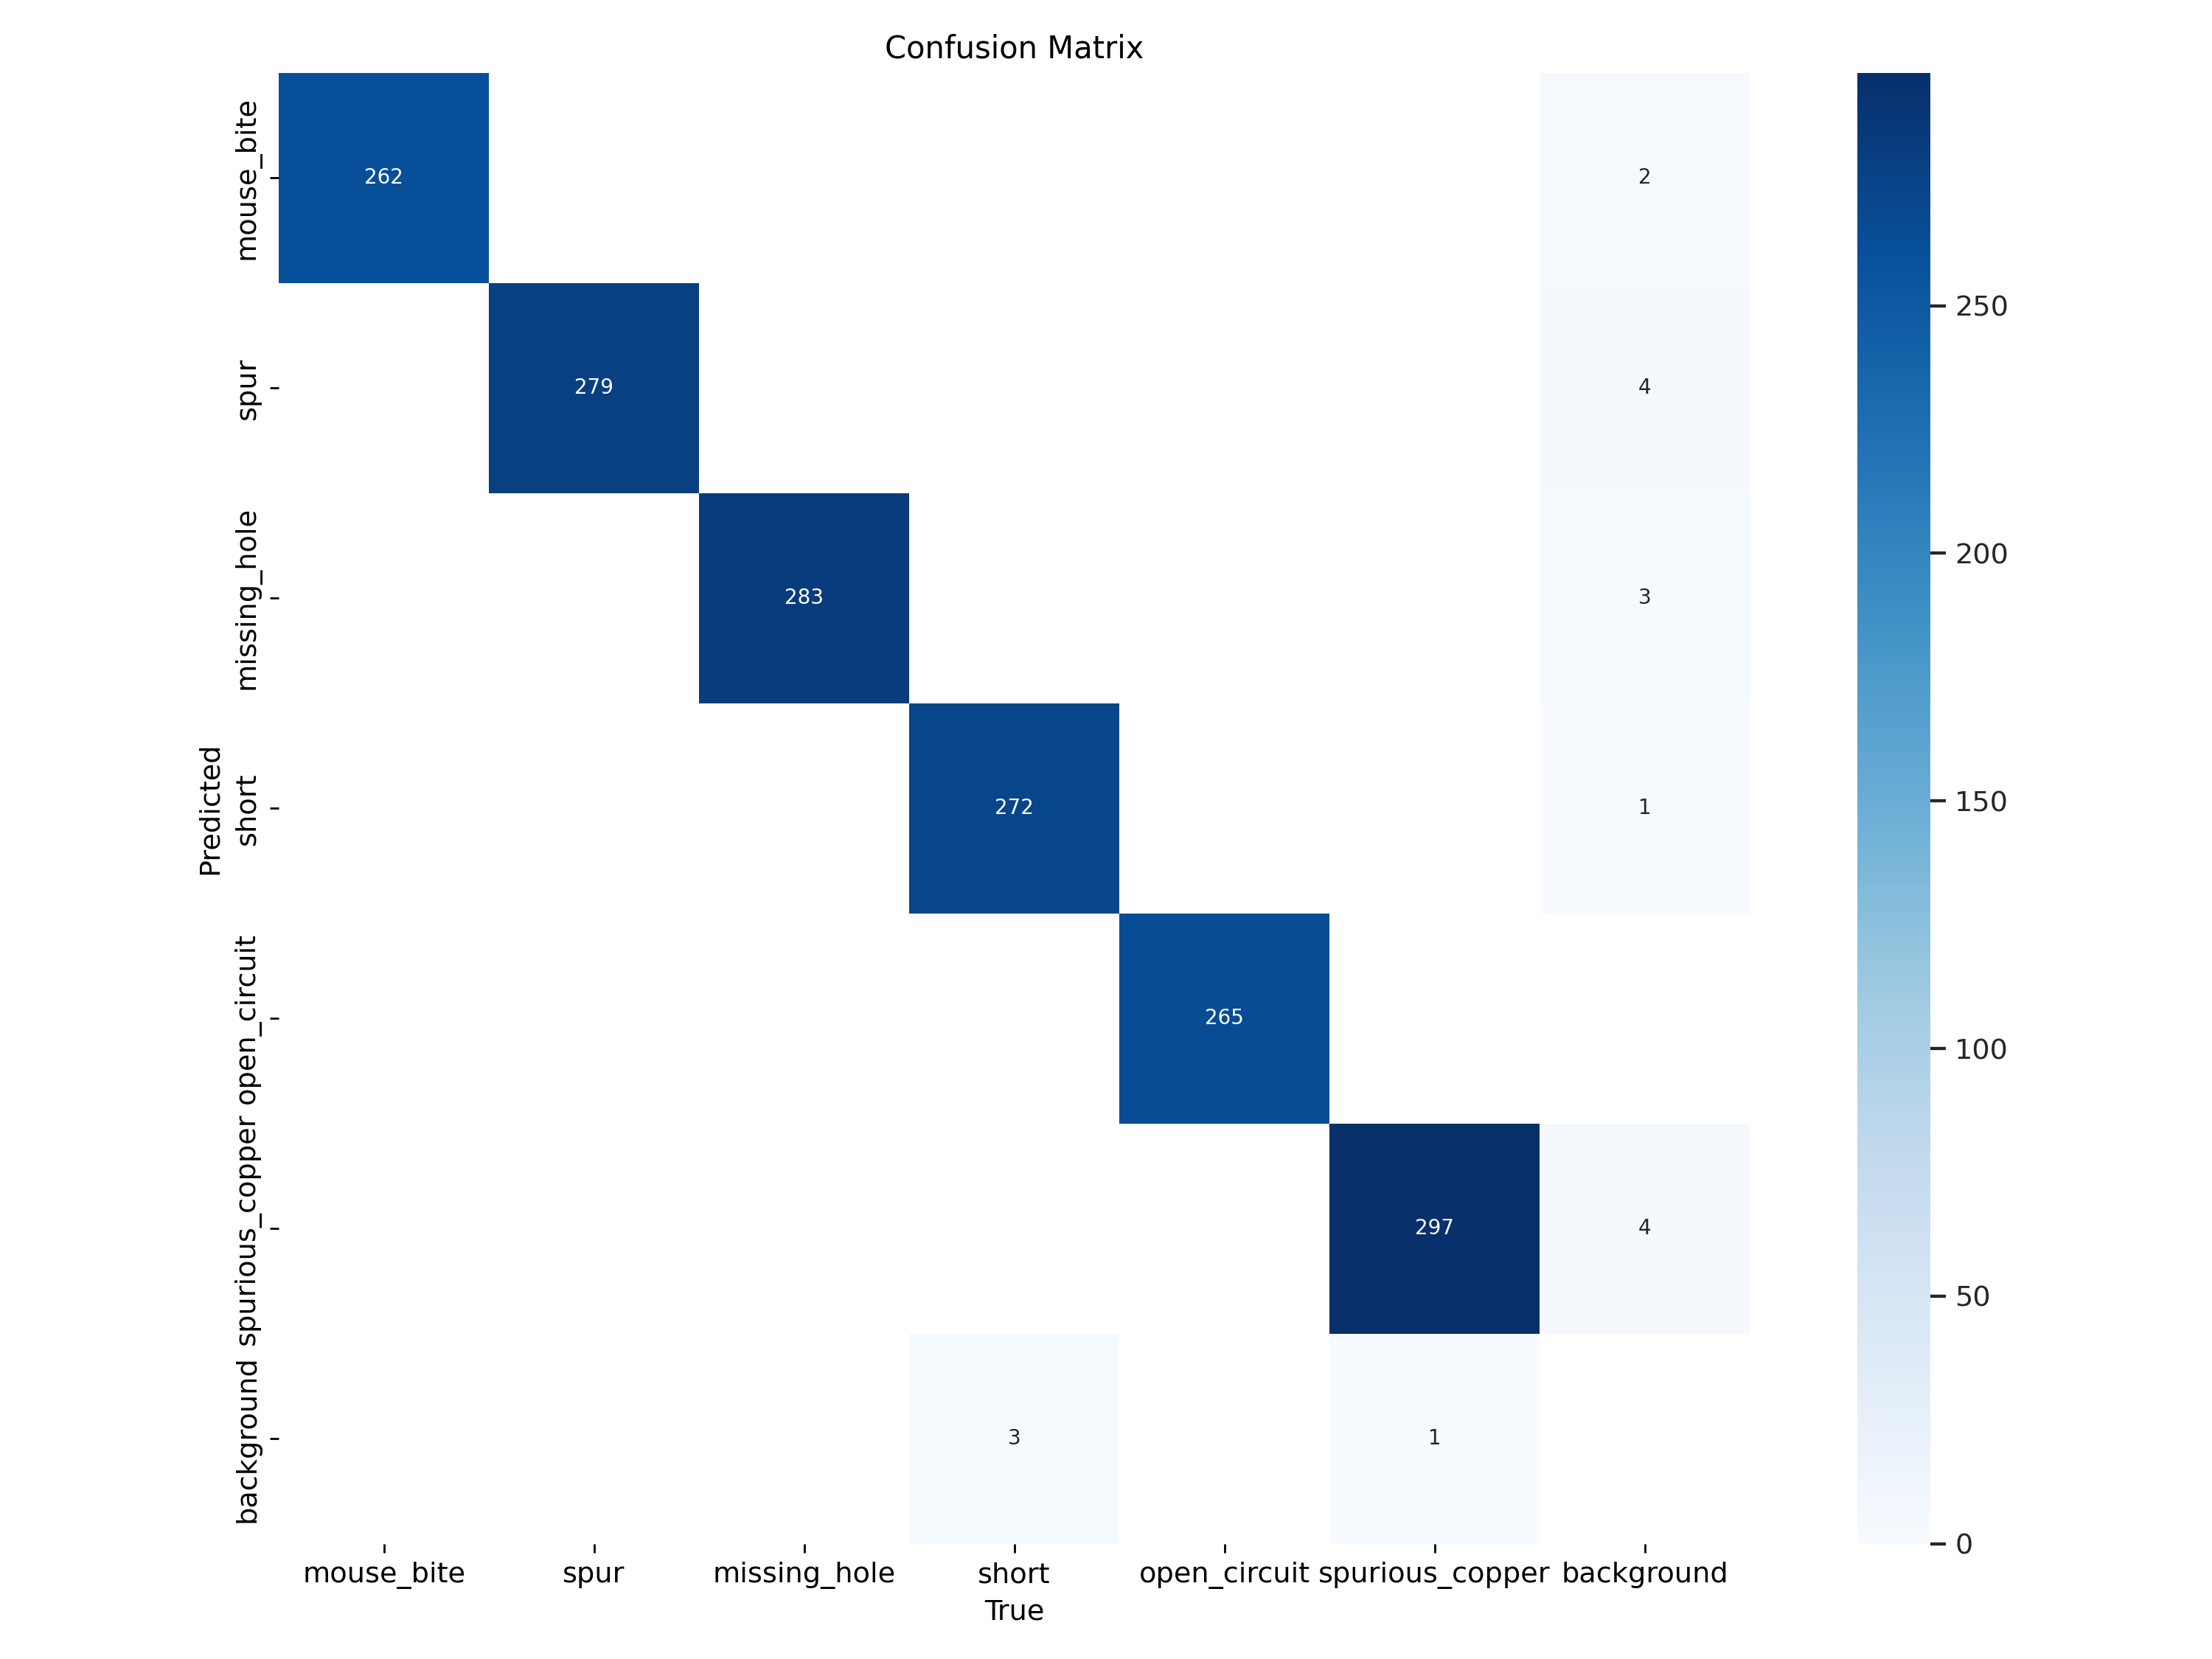

In [22]:
display(Image(experiment_test_path / "confusion_matrix.png"))